In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from get_from_web import get_from_web

#dataset till 24.09 - weekly
#f2save = 'datasetfinalcorrected2.xlsx'
#download_url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathsbyvaccinationstatusengland%2fdeathsoccurringbetween2januaryand24september2021/' + f2save

#dataset till 31.10 - monthly
f2save = 'referencetable2.xlsx'
download_url = 'https://www.ons.gov.uk/file?uri=%2fpeoplepopulationandcommunity%2fbirthsdeathsandmarriages%2fdeaths%2fdatasets%2fdeathsbyvaccinationstatusengland%2fdeathsoccurringbetween1januaryand31october2021/' + f2save


#GET file from web
if True:
    #def get_from_web(download_url, headers=None, num_recurr=1, f2save=None, n_attempts=2):
    ret_code, _ = get_from_web(download_url, f2save=f2save)
    print(ret_code)

1


In [ ]:
"""
Definitions used in this publication
Table 1	Monthly age-standardised mortality rates by vaccination status for deaths involving COVID-19, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 2	Monthly age-standardised mortality rates by vaccination status for non-COVID-19 deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 3	Monthly age-standardised mortality rates by age-group and vaccination status for all deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 4	Monthly age-standardised mortality rates by vaccination status, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021 (machine readable format)
Table 5	Monthly age-standardised mortality rates by age-group and vaccination status for deaths involving COVID-19, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 6	Monthly age-standardised mortality rates by age-group and vaccination status for non-COVID-19 deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 7	Monthly age-standardised mortality rates by age-group and vaccination status for all deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 8	Whole period age-standardised mortality rates by vaccination status, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 2021
Table 9	Whole period counts of deaths and person-years by vaccination status and five year age group, England, deaths occurring between 1 January 2021 and 31 October 2021
"""

In [2]:
#Table 3: Monthly age-standardised mortality rates by vaccination status for all deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 20211,2,3,4,5,6,7,8,9																							
# descr = 'all deaths'
table = 'Table 3'
df = pd.read_excel(f2save, sheet_name=table, header=[3,4], index_col=0)
#remove non data rows
mask = df['Unvaccinated', 'Person-years'].isna()
df = df[~mask]
#remove non data cols
df.drop(columns=['Age-standardised mortality rate per 100,000 person-years.1', 'Upper confidence limit.1'], level=1, inplace=True)


All causes Age-standardised mortality rate per 100,000 person-years


,Unvaccinated,Vaccinated,unvacc to vacc
January,2498.4,1227.2,2.04
February,4683.9,889.4,5.27
March,2676.6,887.1,3.02
April,2055.4,844.8,2.43
May,1695.1,876.8,1.93
June,1502.2,850.0,1.77
July,1479.9,907.2,1.63
August,1562.2,904.2,1.73
September,1484.3,942.6,1.57
October,1361.3,963.1,1.41


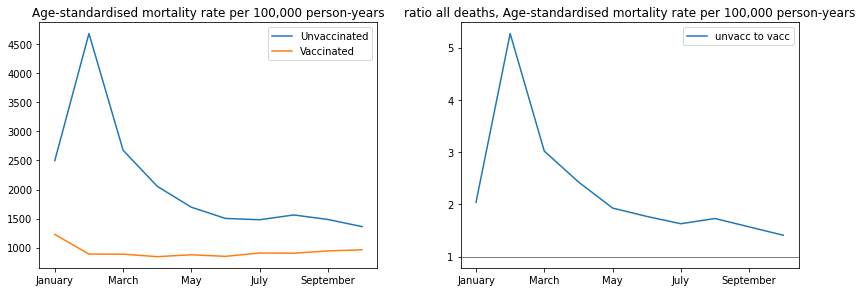

In [3]:
df_unvacc = df['Unvaccinated', 'Age-standardised mortality rate per 100,000 person-years']
df_unvacc.name = 'Unvaccinated'
df_vacc = df['Deaths of ever vaccinated', 'Age-standardised mortality rate per 100,000 person-years']
df_vacc.name = 'Vaccinated'
df2plot = pd.concat([df_unvacc, df_vacc], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()
w = 12
h = 4

df2plot.plot(title='Age-standardised mortality rate per 100,000 person-years', ax=axes[0], figsize=(w,h), legend=True)
ratio = df_unvacc.div(df_vacc).round(2)
ratio.name = 'unvacc to vacc'
ratio.plot(title='ratio all deaths, Age-standardised mortality rate per 100,000 person-years', ax=axes[1], figsize=(w,h), legend=True)
axes[1].axhline(y=1, lw=1, color='grey')

print('All causes Age-standardised mortality rate per 100,000 person-years')
pd.concat([df2plot, ratio], axis=1)

In [4]:
#'Table 9 - Whole period counts of deaths and person-years by vaccination status and five year age group, England, deaths occurring between 1 January 2021 and 31 October 2021'
descr = 'all deaths'
table = 'Table 9'
df = pd.read_excel(f2save, sheet_name=table, header=3)
df.dropna(subset=['Age group'], inplace=True)

vaccination status Unvaccinated                                 Vaccinated  \
deaths data          All deaths Person-years All deaths.per100k All deaths   
Age group                                                                    
10-14                      96.0    2094711.0               4.58       11.0   
15-19                     160.0    1587072.0              10.08       79.0   
20-24                     220.0    1253977.0              17.54      151.0   
25-29                     337.0    1246537.0              27.03      235.0   
30-34                     525.0    1130675.0              46.43      377.0   
35-39                     802.0    1082525.0              74.09      655.0   
40-44                    1137.0     939699.0             121.00     1174.0   
45-49                    2013.0     850696.0             236.63     2157.0   
50-54                    3300.0     758182.0             435.25     4182.0   
55-59                    4792.0     699511.0             685.05     7122.0   
60-64                    6550.0     539511.0            1214.06    10685.0   
65-69                    8166.0     378356.0            2158.28    15517.0   
70-74                   11206.0     305728.0            3665.35    27164.0   
75-79                   12369.0     166159.0            7444.07    36580.0   
80-84                   13416.0      76113.0           17626.42    47880.0   
85-89                   14788.0      49226.0           30041.04    53652.0   
90+                     17386.0      34169.0           50882.38    65380.0   

vaccination status                                 ratio  
deaths data        Person-years All deaths.per100k        
Age group                                                 
10-14                   27359.0              40.21  0.11  
15-19                  434306.0              18.19  0.55  
20-24                  825652.0              18.29  0.96  
25-29                  904676.0              25.98  1.04  
30-34                  964817.0              39.07  1.19  
35-39                 1125499.0              58.20  1.27  
40-44                 1298776.0              90.39  1.34  
45-49                 1505201.0             143.30  1.65  
50-54                 1904960.0             219.53  1.98  
55-59                 1990006.0             357.89  1.91  
60-64                 1817267.0             587.97  2.06  
65-69                 1647727.0             941.72  2.29  
70-74                 1745058.0            1556.62  2.35  
75-79                 1356355.0            2696.93  2.76  
80-84                  975607.0            4907.71  3.59  
85-89                  604837.0            8870.49  3.39  
90+                    342527.0           19087.55  2.67

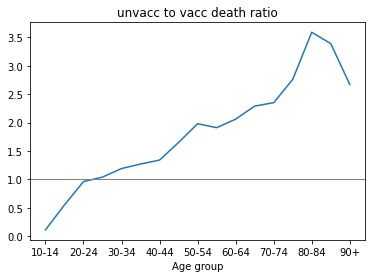

In [9]:
multi = 100000

#create Vaccinated as sum of all kind of vaccinated categories
mask = df['Vaccination status'] == 'Unvaccinated'

def calc_pivot(df_in):
    """create pivot from input dfx"""
    df_out = df_in.pivot_table(index='Age group', aggfunc=np.sum)
    #calc death per 100k person-years ratio
    col = 'All deaths'
    df_out[col+'.per100k'] = (multi * df_out[col].div(df_out['Person-years'])).round(2)
    return df_out

#create Vaccinated as sum of all kind of vaccinated categories
df_vacc = calc_pivot(df[~mask])

#create Non-Vaccinated as sum of all kind of vaccinated categories
df_unvacc = calc_pivot(df[mask])

#concat 2 dfs
dff = pd.concat([df_unvacc, df_vacc], axis=1)
dff.columns = pd.MultiIndex.from_product([['Unvaccinated', 'Vaccinated'], df_unvacc.columns], names=['vaccination status', 'deaths data'])

#select only some columns for clarity
cols = ['All deaths', 'Person-years', 'All deaths.per100k']
dff = dff.loc[:, dff.columns.get_level_values(1).isin(cols)]

dff['ratio'] = (dff['Unvaccinated', 'All deaths.per100k'].div(dff['Vaccinated', 'All deaths.per100k'])).round(2)
fig = dff['ratio'].plot(title='unvacc to vacc death ratio')
fig.axhline(y=1, lw=1, color='grey')
dff


In [13]:
#Table 7: Monthly age-standardised mortality rates by age-group and vaccination status for all deaths, per 100,000 person-years, England, deaths occurring between 1 January 2021 and 31 October 20211,2,3,4,5,6,7,8,9																									
descr = 'all deaths'
table = 'Table 7'
df = pd.read_excel(f2save, sheet_name=table, header=3)
df.dropna(subset=['Age-group'], inplace=True)
df.drop(columns=['Unnamed: 6'], inplace=True)
#convert Months' names to numbers
df.Month = pd.to_datetime(df.Month, format='%B').dt.month
#Ncorrection umber of deaths <3 (assume ==2), where applicable
#why 2 and not 1 or 0?
#because sum of 'Number of deaths' from Table 9 for the particular age group is larger than sum from Table7 (had it been 1)
df.loc[df['Number of deaths']=='<3', 'Number of deaths'] = 2
df['Number of deaths'] = pd.to_numeric(df['Number of deaths'])


In [14]:
multi = 100000
mask = df['Vaccination status'] == 'Unvaccinated'

def calc_pivot(df_in):
    """create pivot from input dfx"""
    df_out = df_in.pivot_table(index='Month', values=['Number of deaths', 'Person-years'], columns=['Age-group'], aggfunc=np.sum)
    tmp = (multi * df_out['Number of deaths'].div(df_out['Person-years'])).round(2)
    tmp.columns = pd.MultiIndex.from_product([['All deaths.per100k'], tmp.columns])
    df_out = pd.concat([df_out, tmp], axis=1)
    return df_out

#create Vaccinated as sum of all kind of vaccinated categories
df_vacc = calc_pivot(df[~mask])

#create Non-Vaccinated as sum of all kind of vaccinated categories
df_unvacc = calc_pivot(df[mask])


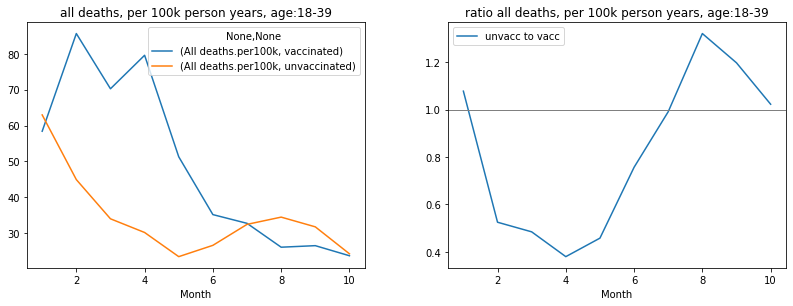

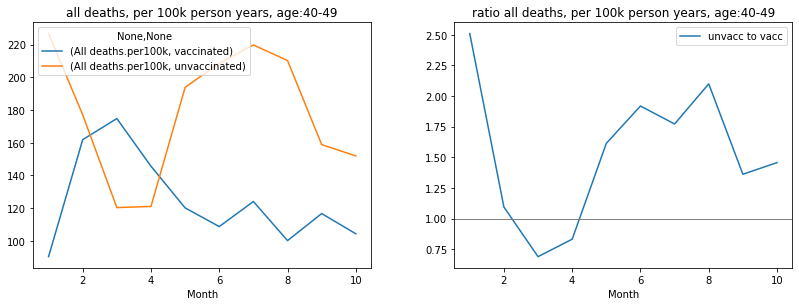

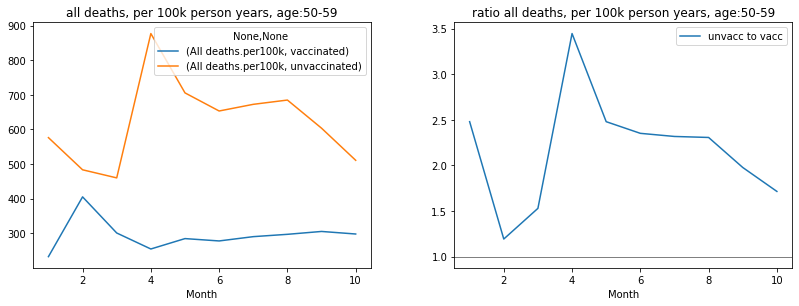

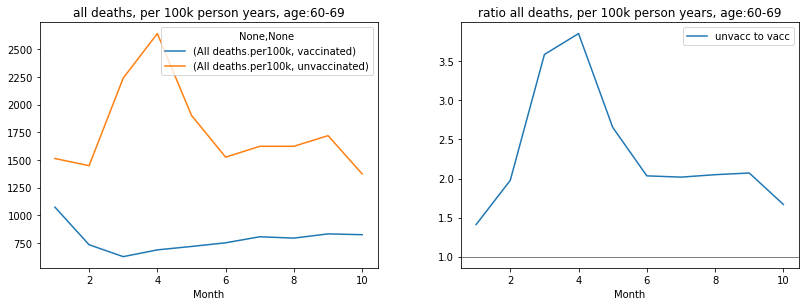

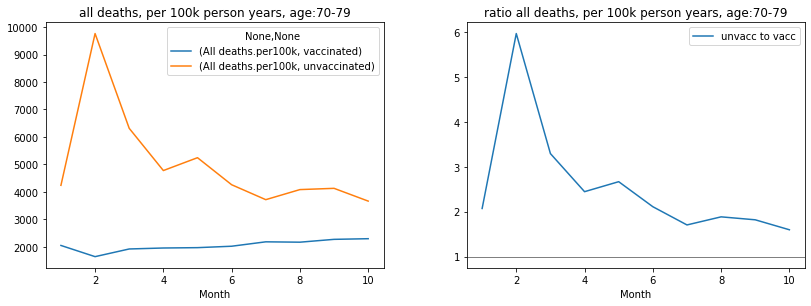

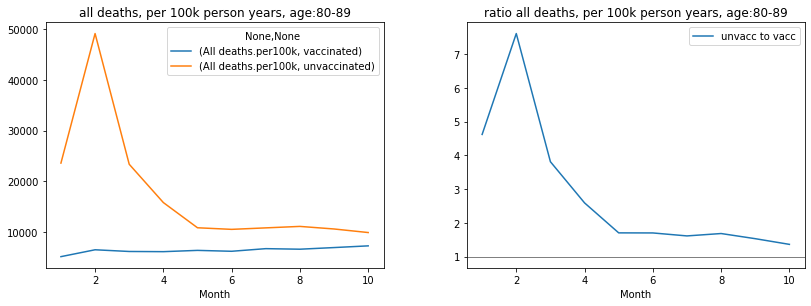

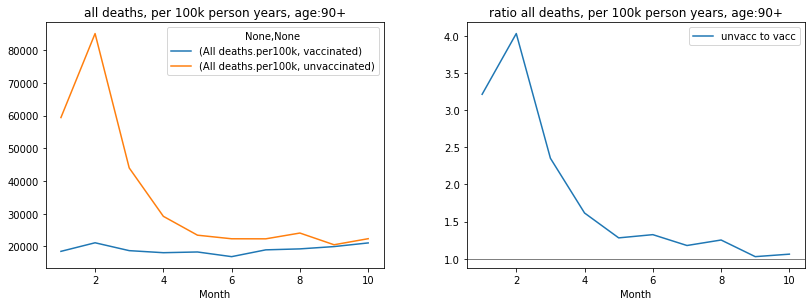

In [15]:
#plot monthly distribution per age group
for age_group in ['18-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.tight_layout()
    w = 12
    h = 4

    df2plot = pd.concat([df_vacc['All deaths.per100k', age_group], df_unvacc['All deaths.per100k', age_group]], axis=1)
    df2plot.columns = pd.MultiIndex.from_product([['All deaths.per100k'], ['vaccinated', 'unvaccinated']])
    df2plot.plot(title='all deaths, per 100k person years, age:%s' %(age_group), ax=axes[0], figsize=(w,h))

    ratio = df2plot['All deaths.per100k', 'unvaccinated'].div(df2plot['All deaths.per100k', 'vaccinated'])
    ratio.name = 'unvacc to vacc'
    ratio.plot(title='ratio all deaths, per 100k person years, age:%s' %(age_group), ax=axes[1], figsize=(w,h), legend=True)
    axes[1].axhline(y=1, lw=1, color='grey')